
# Time Series Manipulation  
## Your first time series
You have learned in the video how to create a sequence of dates using pd.date_range(). You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the dayofweek and weekday_name for each date.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# set datasets direcotories
google_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/google.csv'
nyc_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/air_quality_data/nyc.csv'
yahoo_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/yahoo.csv'
co_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/air_quality_data/co_cities.csv'
assets_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/asset_classes.csv'
stocks_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/nyse.csv'
dow_jones_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/dow_jones.csv'
msft_aaple_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/msft_aapl.csv'
sp500_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/sp500.csv'
unemployment_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/unrate_2000.csv'
debt_unemployment_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/debt_unemployment.csv'
ozone_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/air_quality_data/ozone_nyla.csv'
goog_fb_dir = r'/content/drive/MyDrive/Colab Notebooks/Series temporales/datasets/stock_data/goog_fb.csv'

In [ ]:
# create seven dates starting from '2017-1-1' at (default) daily frequency
seven_days = pd.date_range('2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [ ]:
google = pd.read_csv(google_dir)
# remove missing sequence data so as to leave as in the video
google.dropna(inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    756 non-null    object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.7+ KB




```google``` column ```Date``` contains dates in string format. We need them in the right format: ```datetime64```



In [ ]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
4,2014-01-06,558.10
5,2014-01-07,568.86
6,2014-01-08,570.04


In [ ]:
# convert a string format column into datetime64
google.Date = pd.to_datetime(google.Date)
# set the datetime64 format column as the data index
google.set_index('Date', inplace=True)

google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


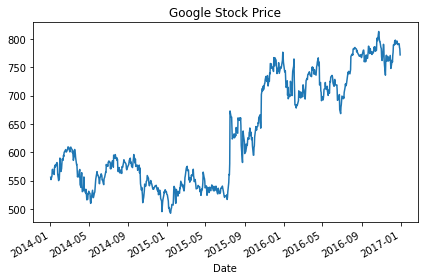

In [ ]:
google.Close.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

## Partial String Indexing

In [ ]:
# pass string for part of date
google['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [ ]:
# slice includes last month, unlike other python slicing
google['2015-3':'2016-2'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-03-02 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


## Upsampling
We have previously removed the missing data, thus we don't have a row for every possible calendar day. We can add the missing dates data by using ```.asfreq()```.  


*   ```'D'``` stands for calendar day. 
*   ```'B'``` for business day.




In [ ]:
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


## Create a time series of air quality data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


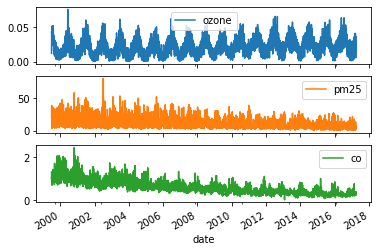

<Figure size 1440x576 with 0 Axes>

In [ ]:
data = pd.read_csv(nyc_dir)
print(data.info()) #We can see ```date``` is not in the right format

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.figure(figsize=(20,8))
plt.show()

## Compare annual stock price trends

In [ ]:
# load and prepare yahoo stock data
yahoo = pd.read_csv(yahoo_dir)
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace=True)
yahoo.head()



,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


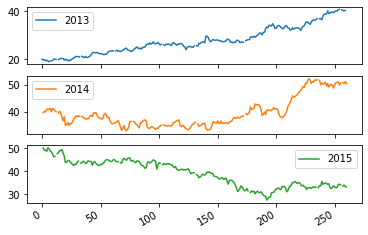

In [ ]:
# Create empty dataframe
prices = pd.DataFrame()

# Select data for each year and concatenate with prices 
for year in ['2013', '2014', '2015']:
  # create price column for iterating year. then, remove index
  price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
  # rename columns from price to the iterating year
  price_per_year.rename(columns={'price': year}, inplace=True)
  # asign the iterating column of year prices to empty dataframe (colbind)
  prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(subplots=True)
plt.show()

# Set and change time series frequency

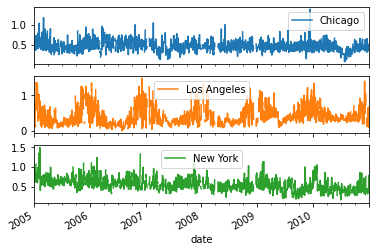

In [ ]:
co = pd.read_csv(co_dir)
co.date = pd.to_datetime(co.date)
co.set_index('date', inplace=True)

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show();

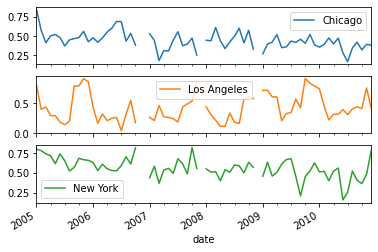

In [ ]:
# Set frequency to monthly (ignores daily values, picks only one day per month)
co = co.asfreq('M')
co.plot(subplots=True)
plt.show()

## **Lags: Shifting across time**  
```.shift()``` allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.  
Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

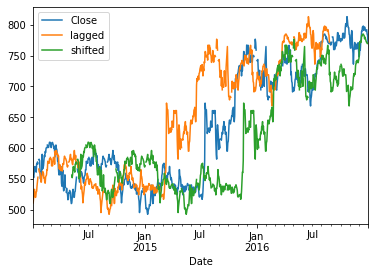

In [ ]:
# Let's import google data again with by using a different approach
google = pd.read_csv(google_dir, parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot(subplots=False)
plt.show()


## **Changes in values**  
Calculate absolute changes from current and shifted prices, and compare the result to the function ```.diff()```.

Usando ```.diff(periods=)``` nos ahorramos hacer el shift y la resta del valor menos el shifted.

In [ ]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print("\ndiferencias entrer 'change_30' y 'diff_30':\n", yahoo.change_30.sub(yahoo.diff_30).value_counts(), '\n')

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64

diferencias entrer 'change_30' y 'diff_30':
 0.0    703
dtype: int64 



We can directly calculate Percentage change between the current and a prior element by using ```.pct_change()```.   


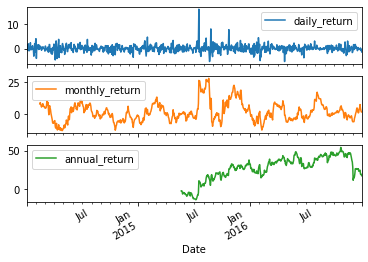

In [ ]:
# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.loc[:, ['daily_return', 'monthly_return', 'annual_return']].plot(subplots=True)
plt.show()

## **Compare times-series growth rates**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


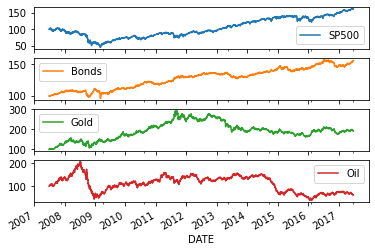

In [ ]:
prices = pd.read_csv(assets_dir, index_col='DATE', parse_dates=['DATE'])
# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot(subplots=True)
plt.show()

We can also use a benchmark to compare the performance.

              JNJ    JPM    XOM
date                           
2010-01-04  64.68  42.85  69.15
2010-01-05  63.93  43.68  69.42
2010-01-06  64.45  43.92  70.02
                DJIA
date                
2010-01-04  10583.96
2010-01-05  10572.02
2010-01-06  10573.68
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


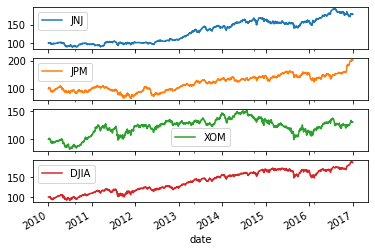

In [ ]:
stocks = pd.read_csv(stocks_dir, parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv(dow_jones_dir, parse_dates=['date'], index_col='date')
# Let's check date indices are aligned (same date)
print(stocks.head(3))
print(dow_jones.head(3))

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones] ,axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot(subplots=True)
plt.show()


**Plot the performance difference versus a benchmark index**.  
Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

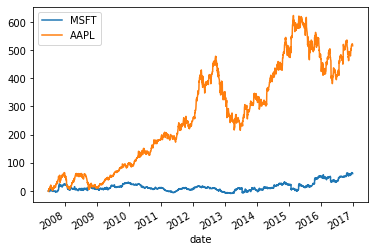

In [ ]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv(msft_aaple_dir, index_col='date', parse_dates=['date'])

# Import index here
sp500 = pd.read_csv(sp500_dir, index_col='date', parse_dates=['date'])

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
# .sub(axis=0) alinea las filas según las fechas
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

# **Resampling**
We can change the data frequency by using pandas tools.  

First, we'll see How to use ```.reindex()``` to conform an existing time series to a DateTimeIndex at a different frequency.
This method replaces an index with a new one placing NaN in locations having no value in the previous index.

## **Convert weekly data to monthly**
```.reindex(method = ['', 'bfill', 'ffill'])```

In [ ]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print('original monthly data:\n', monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print('default fill method:\n', monthly.reindex(weekly_dates))
print('Backfill method:\n', monthly.reindex(weekly_dates ,method='bfill'))
print('Forwardfill method:\n', monthly.reindex(weekly_dates, method='ffill'))


original monthly data:
 2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
default fill method:
 2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
Backfill method:
 2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
Forwardfill method:
 2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


# **Create weekly from monthly data**   
```.asfreq(method = ['', 'bfill', 'ffill'])```

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


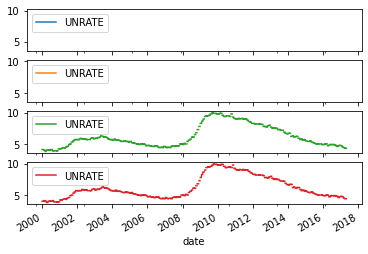

,original,weekly,weekly_backfill,
date,,,,
2000-01-01,4.0,NaN,NaN,NaN
2000-01-02,NaN,NaN,4.1,4.0
2000-01-09,NaN,NaN,4.1,4.0
2000-01-16,NaN,NaN,4.1,4.0
2000-01-23,NaN,NaN,4.1,4.0
2000-01-30,NaN,NaN,4.1,4.0
2000-02-01,4.1,NaN,NaN,NaN
2000-02-06,NaN,NaN,4.0,4.1
2000-02-13,NaN,NaN,4.0,4.1


In [ ]:
# Import data here
unemployment = pd.read_csv(unemployment_dir, 
                           parse_dates=['date'], 
                           index_col='date')

# Show first five rows of weekly series
weekly = unemployment.asfreq('W')
print(weekly.head())


# Show first five rows of weekly series with bfill option
weekly_bfill = unemployment.asfreq('W', method='bfill')
print(weekly_bfill.head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = unemployment.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
data_bind = pd.concat([unemployment, weekly, weekly_bfill, weekly_ffill], 
                      axis=1 )
data_bind.plot(subplots=True)
#weekly_ffill.loc['2015':].plot()
plt.show()
data_bind.columns = ['original', 'weekly', 'weekly_backfill', ' ']
data_bind.iloc[:20]


# **Upsampling and interpolation**  
When upsampling, new empty time points are introduced into your data. In order to assign values to those points we have to interpolate.
Compare the previous approach whith the new ```.resample()```

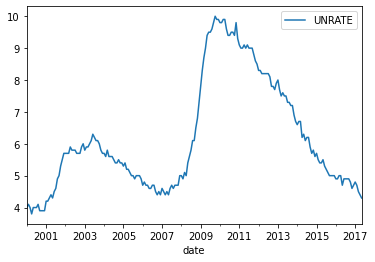

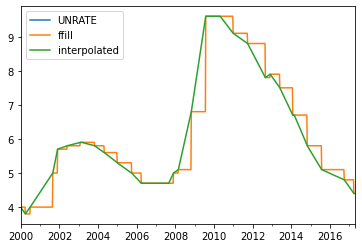

,UNRATE,ffill,interpolated
2000-01-01,4.0,4.0,4.000000
2000-01-08,NaN,4.0,3.984615
2000-01-15,NaN,4.0,3.969231
2000-01-22,NaN,4.0,3.953846
2000-01-29,NaN,4.0,3.938462
...,...,...,...
2017-04-01,4.4,4.4,4.400000
2017-04-08,NaN,4.4,4.400000
2017-04-15,NaN,4.4,4.400000
2017-04-22,NaN,4.4,4.400000


In [ ]:
# renombramos por comodidad de coincidir con el ejemplo en datacamp
monthly = unemployment

# Create weekly dates
weekly_dates = pd.date_range(start=monthly.index.min(), 
                             end=monthly.index.max(),
                             freq='W-SAT')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
monthly.plot()
weekly.plot()
plt.show()

weekly

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


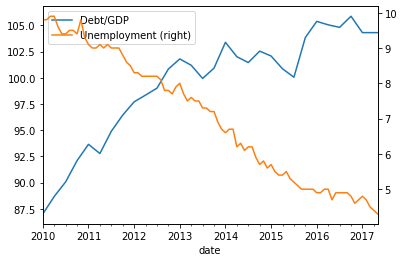

In [ ]:
# Import & inspect data here
data = pd.read_csv(debt_unemployment_dir, index_col='date', parse_dates=['date'])
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()

# **Downsampling and aggregation**  
Downsampling reduce the frequency of a Time series (hour to day), etc...


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB


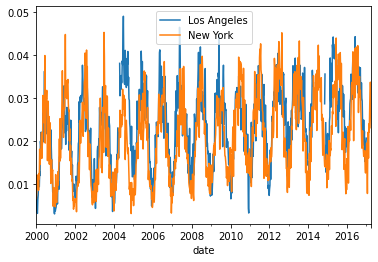

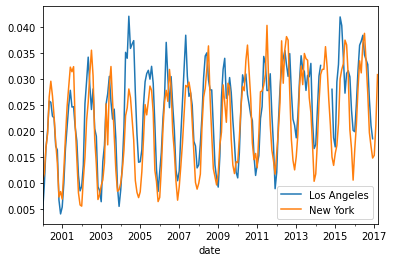

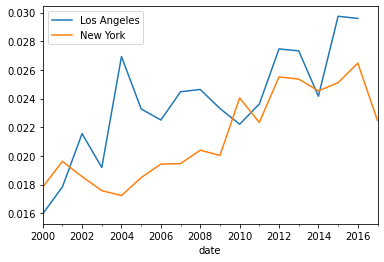

In [ ]:
# Import and inspect data here
ozone = pd.read_csv(ozone_dir, parse_dates=['date'], index_col='date')
ozone.info();

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot();
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot();
plt.show();

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot();
plt.show();


Compare the trend of several monthly averages

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


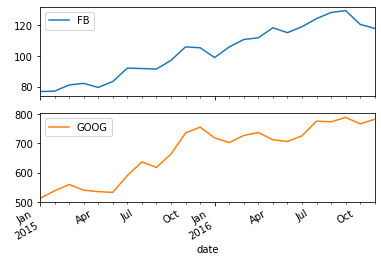

In [ ]:
# Import and inspect data here
stocks = pd.read_csv(goog_fb_dir, index_col='date', parse_dates=['date'])
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show()

